In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

<h1>Data Collection<h1>

<h2>Baca File Hasil Scrapping</h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Path file di Google Drive
africa_file = '/content/drive/Shareddrives/UAS DATA/scraped_BBC_africa.csv'
asia_file = '/content/drive/Shareddrives/UAS DATA/scraped_BBC_asia.csv'
# Baca file seperti biasa
africa = pd.read_csv(africa_file)

# Tampilkan data
africa.head()


,media,date,title,description,url,access_date,access_time
0,BBC,2025-05-28,Focus on Africa: African leaders attend Russia...,Over forty African countries attend Russia's I...,https://www.bbc.com/audio/play/p0ldywkf,2025-05-30,11:32:21
1,BBC,2025-05-23,Africa Daily,Africa Daily has now come to an end. But do li...,https://www.bbc.com/audio/brand/p0925ydp,2025-05-30,11:32:21
2,BBC,2025-05-23,Africa Daily,Africa Daily,https://www.bbc.com/audio/series/p0925ydp,2025-05-30,11:32:21
3,BBC,2025-05-27,Introducing: Focus on Africa,The big stories from across the continent,https://www.bbc.com/audio/play/p0lds132,2025-05-30,11:32:21
4,BBC,2025-05-23,South Africa releases crime stats,South Africa crime: who suffers most from the ...,https://www.bbc.com/audio/play/p0ld2v28,2025-05-30,11:32:21


In [ ]:
# Baca file seperti biasa
asia = pd.read_csv(asia_file)

# Tampilkan data
asia.head()

,media,date,title,description,url,access_date,access_time
0,BBC,2025-05-26,Man Utd fly to Asia on post-season tour,"Manchester United have taken a 32-man squad, i...",https://www.bbc.com/sport/football/articles/ce...,2025-05-30,11:05:11
1,BBC,2025-05-27,'Why support a team that loses?' - how fans in...,Manchester United were once undoubtedly the mo...,https://www.bbc.com/sport/football/articles/cx...,2025-05-30,11:05:11
2,BBC,2025-04-30,"How Ronaldo, Firmino and Toney are helping Sau...",Three of the four AFC Champions League semi-fi...,https://www.bbc.com/audio/play/p0l7f4zg,2025-05-30,11:05:11
3,BBC,2025-04-22,"US sets tariffs of up to 3,521% on South East ...",Several Chinese solar companies with factories...,https://www.bbc.com/news/articles/c5ygdv47vlzo,2025-05-30,11:05:11
4,BBC,2025-05-29,US and China struggle for dominance as officia...,China is chipping away at the US's dominant po...,https://www.bbc.com/news/articles/ced2xxpy532o,2025-05-30,11:05:11


# <h3>Tambah Kolom Benua (asal berita)</h3>

<h4>Africa</h4>

In [ ]:
africa ['continent'] = 'Africa'
print (africa)


     media        date                                              title  \
0      BBC  2025-05-28  Focus on Africa: African leaders attend Russia...   
1      BBC  2025-05-23                                       Africa Daily   
2      BBC  2025-05-23                                       Africa Daily   
3      BBC  2025-05-27                       Introducing: Focus on Africa   
4      BBC  2025-05-23                  South Africa releases crime stats   
...    ...         ...                                                ...   
9954   BBC  2021-09-29      Exeter sign South Africa international Mpupha   
9955   BBC  2019-10-12              Ireland must scale new heights - Best   
9956   BBC  2018-11-12             Nationalism driving fake news in India   
9957   BBC  2022-11-26  Ospreys claim unlikely bonus point in Bulls de...   
9958   BBC  2020-09-16        Mercy Baguma partner reveals football dream   

                                            description  \
0     Over forty

In [ ]:
africa.head()

,media,date,title,description,url,access_date,access_time,continent
0,BBC,2025-05-28,Focus on Africa: African leaders attend Russia...,Over forty African countries attend Russia's I...,https://www.bbc.com/audio/play/p0ldywkf,2025-05-30,11:32:21,Africa
1,BBC,2025-05-23,Africa Daily,Africa Daily has now come to an end. But do li...,https://www.bbc.com/audio/brand/p0925ydp,2025-05-30,11:32:21,Africa
2,BBC,2025-05-23,Africa Daily,Africa Daily,https://www.bbc.com/audio/series/p0925ydp,2025-05-30,11:32:21,Africa
3,BBC,2025-05-27,Introducing: Focus on Africa,The big stories from across the continent,https://www.bbc.com/audio/play/p0lds132,2025-05-30,11:32:21,Africa
4,BBC,2025-05-23,South Africa releases crime stats,South Africa crime: who suffers most from the ...,https://www.bbc.com/audio/play/p0ld2v28,2025-05-30,11:32:21,Africa


In [ ]:
#africa.to_csv("bbc_africa.csv", index=False)

<h4>Asia</h4>

In [ ]:
asia ['continent'] = 'Asia'
print (asia)

     media        date                                              title  \
0      BBC  2025-05-26            Man Utd fly to Asia on post-season tour   
1      BBC  2025-05-27  'Why support a team that loses?' - how fans in...   
2      BBC  2025-04-30  How Ronaldo, Firmino and Toney are helping Sau...   
3      BBC  2025-04-22  US sets tariffs of up to 3,521% on South East ...   
4      BBC  2025-05-29  US and China struggle for dominance as officia...   
...    ...         ...                                                ...   
9438   BBC  2021-11-18  'Outrageous' India sexual assault order struck...   
9439   BBC  2021-06-30   N Korea sees 'grave incident' after Covid lapses   
9440   BBC  2021-06-12  The year in the life of a viral Delhi eatery o...   
9441   BBC  2022-03-04               China Premier League coverage pulled   
9442   BBC  2019-05-20            Japan's economic growth beats forecasts   

                                            description  \
0     Manchester

In [ ]:
asia.head()

,media,date,title,description,url,access_date,access_time,continent
0,BBC,2025-05-26,Man Utd fly to Asia on post-season tour,"Manchester United have taken a 32-man squad, i...",https://www.bbc.com/sport/football/articles/ce...,2025-05-30,11:05:11,Asia
1,BBC,2025-05-27,'Why support a team that loses?' - how fans in...,Manchester United were once undoubtedly the mo...,https://www.bbc.com/sport/football/articles/cx...,2025-05-30,11:05:11,Asia
2,BBC,2025-04-30,"How Ronaldo, Firmino and Toney are helping Sau...",Three of the four AFC Champions League semi-fi...,https://www.bbc.com/audio/play/p0l7f4zg,2025-05-30,11:05:11,Asia
3,BBC,2025-04-22,"US sets tariffs of up to 3,521% on South East ...",Several Chinese solar companies with factories...,https://www.bbc.com/news/articles/c5ygdv47vlzo,2025-05-30,11:05:11,Asia
4,BBC,2025-05-29,US and China struggle for dominance as officia...,China is chipping away at the US's dominant po...,https://www.bbc.com/news/articles/ced2xxpy532o,2025-05-30,11:05:11,Asia


In [ ]:
#asia.to_csv("bbc_asia.csv", index=False)

# <h3>Gabungkan Kedua Benua</h3>

In [ ]:
bbc = pd.concat([asia, africa], ignore_index=True)

#urutan data
bbc = bbc.sort_values(by='date', ascending=False)

#cek hasil
bbc.to_csv("bbc_asia_africa.csv", index=False)
print(bbc.head())

     media        date                                              title  \
9886   BBC  2025-05-30  Sale move could ignite Springboks chance - Ver...   
9515   BBC  2025-05-30  Plane carrying Liberian president involved in ...   
188    BBC  2025-05-30  Lingard on Man Utd, Forest regrets and playing...   
9905   BBC  2025-05-30  Five musicians murdered in suspected Mexican c...   
9467   BBC  2025-05-30  Suspect in South African student's murder kill...   

                                            description  \
9886  Exeter forward Jacques Vermeulen says his fort...   
9515  Part of the presidential jet's landing gear ma...   
188   Jesse Lingard tells BBC Sport about life in So...   
9905  Nine alleged members of the Gulf Cartel have b...   
9467  The main suspect in the murder of Olorato Mong...   

                                                    url access_date  \
9886  https://www.bbc.com/sport/rugby-union/articles...  2025-05-30   
9515     https://www.bbc.com/news/articl

# Data Preparation

# <h2>Hapus Baris yang Duplikat Berdasarkan 'Title' dan 'Description'</h2>

In [ ]:
before = len(bbc)
bbc = bbc.drop_duplicates(subset=['title', 'description'])
after = len(bbc)

jumlah_dihapus = before - after
print(f"baris yang dihapus: {jumlah_dihapus}")


baris yang dihapus: 4322


# <h2>Hapus Baris yang Kosong Berdasarkan 'Title' dan 'Description'</h2>

In [ ]:
before = len(bbc)
bbc = bbc.dropna(subset=['title', 'description'])
after = len(bbc)

jumlah_dihapus = before - after
print(f"baris yang dihapus: {jumlah_dihapus}")


baris yang dihapus: 48


In [ ]:
bbc.head()

,media,date,title,description,url,access_date,access_time,continent
9886,BBC,2025-05-30,Sale move could ignite Springboks chance - Ver...,Exeter forward Jacques Vermeulen says his fort...,https://www.bbc.com/sport/rugby-union/articles...,2025-05-30,11:32:21,Africa
9515,BBC,2025-05-30,Plane carrying Liberian president involved in ...,Part of the presidential jet's landing gear ma...,https://www.bbc.com/news/articles/clyqkrqv1gro,2025-05-30,11:32:21,Africa
188,BBC,2025-05-30,"Lingard on Man Utd, Forest regrets and playing...",Jesse Lingard tells BBC Sport about life in So...,https://www.bbc.com/sport/football/articles/c2...,2025-05-30,11:05:11,Asia
9905,BBC,2025-05-30,Five musicians murdered in suspected Mexican c...,Nine alleged members of the Gulf Cartel have b...,https://www.bbc.com/news/articles/cd7g4w55r8qo,2025-05-30,11:32:21,Africa
9467,BBC,2025-05-30,Suspect in South African student's murder kill...,The main suspect in the murder of Olorato Mong...,https://www.bbc.com/news/articles/cly31j72p3zo,2025-05-30,11:32:21,Africa


# <h2>Menggabungkan Title dan Description</h2>

Gabungan title + description memberi konteks yang lebih lengkap dan meningkatkan kualitas hasil analisis teks

In [ ]:
bbc['text'] = bbc['title'].fillna('') + ' ' + bbc['description'].fillna('')
bbc.head()

,media,date,title,description,url,access_date,access_time,continent,text
9886,BBC,2025-05-30,Sale move could ignite Springboks chance - Ver...,Exeter forward Jacques Vermeulen says his fort...,https://www.bbc.com/sport/rugby-union/articles...,2025-05-30,11:32:21,Africa,Sale move could ignite Springboks chance - Ver...
9515,BBC,2025-05-30,Plane carrying Liberian president involved in ...,Part of the presidential jet's landing gear ma...,https://www.bbc.com/news/articles/clyqkrqv1gro,2025-05-30,11:32:21,Africa,Plane carrying Liberian president involved in ...
188,BBC,2025-05-30,"Lingard on Man Utd, Forest regrets and playing...",Jesse Lingard tells BBC Sport about life in So...,https://www.bbc.com/sport/football/articles/c2...,2025-05-30,11:05:11,Asia,"Lingard on Man Utd, Forest regrets and playing..."
9905,BBC,2025-05-30,Five musicians murdered in suspected Mexican c...,Nine alleged members of the Gulf Cartel have b...,https://www.bbc.com/news/articles/cd7g4w55r8qo,2025-05-30,11:32:21,Africa,Five musicians murdered in suspected Mexican c...
9467,BBC,2025-05-30,Suspect in South African student's murder kill...,The main suspect in the murder of Olorato Mong...,https://www.bbc.com/news/articles/cly31j72p3zo,2025-05-30,11:32:21,Africa,Suspect in South African student's murder kill...


# <h2>Bersihkan Teks</h2>

<h3>Fungsi</h3>

In [ ]:
# Download NLTK resources
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('tokenizers/punkt_tab') # Add this line to check for punkt_tab
    print("NLTK resources already downloaded")
except LookupError:
    print("Downloading NLTK resources...")
    nltk.download('punkt')
    nltk.download('punkt_tab') # Add this line to download punkt_tab
    nltk.download('stopwords')
    print("Download complete")

NLTK resources already downloaded


In [ ]:

def clean_text(text):
    text = text.lower()  # lowercase

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002700-\U000027BF"  # other symbols
                               u"\U000024C2-\U0001F251"  # enclosed characters
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    #ps = PorterStemmer()
    #tokens = [ps.stem(word) for word in tokens]

    return " ".join(tokens)

# Tes fungsi
sample = "Man Utd fly to Asia on post-season tour Manchester United have taken a 32-man squad, including many first-team players, to Asia for two post-season friendlies."
clean_sample = clean_text(sample)
print(f"Original: {sample}")
print(f"Cleaned : {clean_sample}")


Original: Man Utd fly to Asia on post-season tour Manchester United have taken a 32-man squad, including many first-team players, to Asia for two post-season friendlies.
Cleaned : man utd fly asia postseason tour manchester united taken man squad including many firstteam players asia two postseason friendlies


# <h3>Penerapan</h3>

In [ ]:
#Menerapkan fungsi cleaning
bbc['clean_text'] = bbc['text'].apply(clean_text)

#cek hasil
print(bbc[['text', 'clean_text']].head())

#save ke csv
#bbc.to_csv('bbc_asiaafrica_clean.csv', index=False)

                                                   text  \
9886  Sale move could ignite Springboks chance - Ver...   
9515  Plane carrying Liberian president involved in ...   
188   Lingard on Man Utd, Forest regrets and playing...   
9905  Five musicians murdered in suspected Mexican c...   
9467  Suspect in South African student's murder kill...   

                                             clean_text  
9886  sale move could ignite springboks chance verme...  
9515  plane carrying liberian president involved lan...  
188   lingard man utd forest regrets playing south k...  
9905  five musicians murdered suspected mexican cart...  
9467  suspect south african students murder killed p...  


# <h2>Labeling</h2>

In [ ]:
def assign_topic(clean_text):
    clean_text = clean_text.lower()

    politics_keywords      = ['propaganda', 'eu', 'uk', 'ministry', 'un', 'us', 'powersharing', 'strike', 'coup détat', 'opposition', 'persecution',
                              'port', 'envoy', 'putin', 'democracy', 'politics', 'president', 'election', 'parliament', 'legislative', 'politician',
                              'government', 'party', 'campaign', 'diplomatic', 'country', 'diplomacy', 'candidate', 'council', 'trump', 'xi jinping',
                              'visa', 'economic', 'countries', 'china', 'military', 'cooperation', 'war', 'army', 'political', 'soldiers', 'nuclear',
                              'white house', 'netanyahu', 'defectors', 'immunity prosecution', 'levy', 'ceasefire', 'gaza', 'imf', 'refugee',
                              'conflict', 'press', 'crisis', 'air strikes', 'global', 'tension', 'daniella weiss', 'minister', 'rnas culdrose',
                              'expels', 'airstrike', 'relations', 'dr congo']
    crime_keywords         = ['steal', 'dangerous', 'exploitation', 'robbers', 'data breach', 'drugging', 'illegal', 'jail', 'cannabis', 'terrorist',
                              'disappeared', 'abduct', 'dies', 'investigation', 'piracy', 'cocaine', 'killer', 'killing', 'crime', 'arrest', 'case',
                              'murder', 'theft', 'caught', 'police', 'prison', 'corruption', 'criminal', 'court', 'suspect', 'evidence', 'fake',
                              'missing', 'tragic', 'bodies found', 'prosecutors', 'law', 'activist', 'trafficking', 'rebel', 'crackdown', 'attack',
                              'smashed', 'jailed', 'dead', 'deaths', 'abuse', 'suicide', 'death', 'crash', 'killed', 'shelling', 'explosions',
                              'gambia', 'stolen', 'scam', 'weapons']
    health_keywords        = ['surgery', 'body', 'malaria', 'vaccinate', 'monkeypox', 'polio', 'sanitary', 'autism', 'sight loss', 'menstrual',
                              'health', 'covid', 'virus', 'vaccine', 'disease', 'hospital', 'doctor', 'medicine', 'epidemic', 'pandemic',
                              'isolation', 'test', 'treatment', 'drugs', 'nursing', 'eating disorder', 'injury', 'menopause', 'injured', 'poisoning',
                             'poisonings', 'skin', 'aid', 'safety', 'broken collarbone', 'medical', 'parkinsons']
    entertainment_keywords = ['social', 'instagram', 'grammys', 'hiatus', 'rihanna', 'solo', 'celebrities', 'actor', 'singer', 'concert', 'tickets',
                              'star', 'family', 'bbc', 'game', 'celebrations', 'listeners', 'writer', 'tiktok', 'tourism', 'online', 'media',
                              'broadcasters', 'delicious', 'photo', 'design', 'dictionary', 'charity', 'popular', 'reporter', 'journalist',
                              'netflixs','food', 'actors', 'actress', 'entertainment', 'film', 'music', 'artist', 'celebrity', 'cinema', 'theater',
                              'concert', 'show', 'festival', 'drama', 'series', 'tv', 'novel', 'comedian', 'literature', 'museum', 'trips', 'carnival',
                              'happiest cities', 'mixtape', 'art', 'skatepark', 'model', 'disney', 'facebook', 'storytelling', 'influencer',
                              'jiggly caliente', 'youtubes', 'tiaras natalie mageza', 'trendy', 'author', 'sculptures', 'painting', 'beauty' ]
    sports_keywords        = ['paralympian', 'wrestler', 'scott barrett', 'grand prix', 'paddleboarder', 'lionesses', 'bowler', 'holesinone',
                              'netball', 'handballs', 'tennis', 'seasons', 'black stars', 'ufc', 'heather knight', 'boxer', 'twenty internationals',
                              'harlequins', 'notts', 'joburg open', 'win', 'rfc', 'keeper', 'minto', 'sports', 'league', 'football', 'soccer',
                              'basketball', 'athlete', 'match', 'competition', 'tournament', 'cup', 'sharks', 'champion', 'team', 'coach',
                              'springboks', 'mma', 'french open', 'shining', 'runs', 'doubleheaders', 'england tigers', 'cricket', 'wolves',
                              'manchester', 'united', 'wickets', 'rugby', 'run', 'faletau', 'walter steers', 'wrestling', 'tigers', 'players',
                              'mud wrestlers', 'everest summit', 'barbarians squad', 'chess', 'northampton saints', 'lions', 'dragons',
                              'jl du preez', 'victoria falls', 'gareth lauren', 'sport', 'referee', 'olympian', 'olympic', 'six nations', 'liverpool',
                              'cyclists', 'arsenal', 'marathon', 'chelsea', 'cycles', 'goalkeeper']
    technology_keywords    = ['electric', 'robotic', 'mobile', 'jet', 'ai', 'power bank', 'futuristic', 'crypto', 'satellite', 'record', 'batteries',
                              'photographed', 'phone', 'science', 'technology', 'scientist', 'space', 'universe', 'chip', 'seaplanes', 'bullet trains',
                              'highspeed rail', 'evolution', 'tech', 'internet', 'educating', 'robots', 'electronic']
    environment_keywords   = ['pigeon', 'floods', 'beach', 'farm', 'elephant', 'cheetah', 'cyclone', 'monkeys', 'tsunami', 'recycling', 'oyster',
                              'drownings', 'sea', 'island', 'whale', 'animal', 'flooding', 'eagle', 'fire', 'weather', 'eclipse', 'glacier', 'osprey',
                              'cosmos', 'duck', 'rescuers', 'quake', 'adventure', 'population', 'park', 'cyclones', 'ospreys', 'contamination',
                              'mounds', 'climate', 'storm', 'ocean', 'rare antelope', 'fish', 'summer', 'flooded', 'ship', 'wildlife', 'zoo',
                              'himalayas', 'wild', 'volcano', 'travel', 'bird', 'penguins', 'shea', 'garden', 'blossoms', 'mount', 'everest',
                              'chimpanzees', 'horses', 'deer', 'water', 'nature', 'river', 'bees', 'tropical', 'planets', 'blossom']

    if any(word in clean_text for word in politics_keywords):
        return 'Politics'
    elif any(word in clean_text for word in crime_keywords):
        return 'Crime'
    elif any(word in clean_text for word in health_keywords):
        return 'Health'
    elif any(word in clean_text for word in entertainment_keywords):
        return 'Entertainment'
    elif any(word in clean_text for word in sports_keywords):
        return 'Sports'
    elif any(word in clean_text for word in technology_keywords):
        return 'Technology'
    elif any(word in clean_text for word in environment_keywords):
        return 'Environment'
    else:
        return 'Others'


# Langkah 2: Terapkan ke DataFrame
bbc['label'] = bbc['clean_text'].apply(assign_topic)

# Langkah 3 (Opsional): Lihat distribusi label
print(bbc['label'].value_counts())

label
Politics         11287
Crime              981
Entertainment      793
Sports             603
Health             489
Others             434
Technology         260
Environment        185
Name: count, dtype: int64


In [ ]:
#bbc.to_csv("bbc_labeling.csv", index = False)

In [ ]:
#from google.colab import files
#files.download('bbc_labeling.csv')

In [ ]:
kalimat_uji = " plane carrying liberian president involved"
label = assign_topic(kalimat_uji)
print("Prediksi topik:", label)

Prediksi topik: Politics


# <h1>Data Preprocessing</h1>

In [ ]:
bbc_file = '/content/drive/Shareddrives/UAS DATA/bbc_labeling.csv'

# Baca file seperti biasa
bbc = pd.read_csv(bbc_file)

<h2>Analisis dan Olah Data Berita</h2>

# <h2>Tokenisasi</h2>

<h3>Analisis Teks Berdasarkan Label</h3>

In [ ]:
# Label encoding untuk kolom label
le_label = LabelEncoder()
bbc['label_encoded'] = le_label.fit_transform(bbc['label'])

# Label encoding untuk kolom benua
le_benua = LabelEncoder()
bbc['continent_encoded'] = le_benua.fit_transform(bbc['continent'])

# Lihat hasil encode
print(bbc[['label', 'label_encoded', 'continent', 'continent_encoded']].head())


      label  label_encoded continent  continent_encoded
0  Politics              5    Africa                  0
1  Politics              5    Africa                  0
2  Politics              5      Asia                  1
3  Politics              5    Africa                  0
4  Politics              5    Africa                  0


In [ ]:
# ===== ENCODING LABEL =====
label_encoder = LabelEncoder()
bbc['label_encoded'] = label_encoder.fit_transform(bbc['label'])
label_classes = label_encoder.classes_
print("Label classes:", label_classes)
print("Encoded label values:", np.unique(bbc['label_encoded']))

# ===== ENCODING BENUA =====
continent_encoder = LabelEncoder()
bbc['continent_encoded'] = continent_encoder.fit_transform(bbc['continent'])
continent_classes = continent_encoder.classes_
print("Continent classes:", continent_classes)
print("Encoded continent values:", np.unique(bbc['continent_encoded']))

# ===== TOKENISASI TEKS =====
max_words = 10000  # Jumlah kata maksimum dalam vocab
max_len = 100      # Panjang maksimum tiap sequence

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(bbc['clean_text'])

sequences = tokenizer.texts_to_sequences(bbc['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Shape of padded sequences: {padded_sequences.shape}")


Label classes: ['Crime' 'Entertainment' 'Environment' 'Health' 'Others' 'Politics'
 'Sports' 'Technology']
Encoded label values: [0 1 2 3 4 5 6 7]
Continent classes: ['Africa' 'Asia']
Encoded continent values: [0 1]
Vocabulary size: 26792
Shape of padded sequences: (15032, 100)


# <h2>Splitting</h2>

In [ ]:

# ==== Split data untuk klasifikasi kategori berita ====
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(
    padded_sequences,
    bbc['label_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=bbc['label_encoded']
)

print("News Category Classification Data Split:")
print(f"Training set shape: {X_train_news.shape}")
print(f"Test set shape: {X_test_news.shape}")
print(f"Training labels distribution: {np.bincount(y_train_news)}")
print(f"Test labels distribution: {np.bincount(y_test_news)}")


News Category Classification Data Split:
Training set shape: (12025, 100)
Test set shape: (3007, 100)
Training labels distribution: [ 785  634  148  391  347 9029  483  208]
Test labels distribution: [ 196  159   37   98   87 2258  120   52]


# <h1>Explanatory Data Analysis (EDA)</H1>

<h2>Visualisasi Distribusi Data Berdasarkan Label</h2>

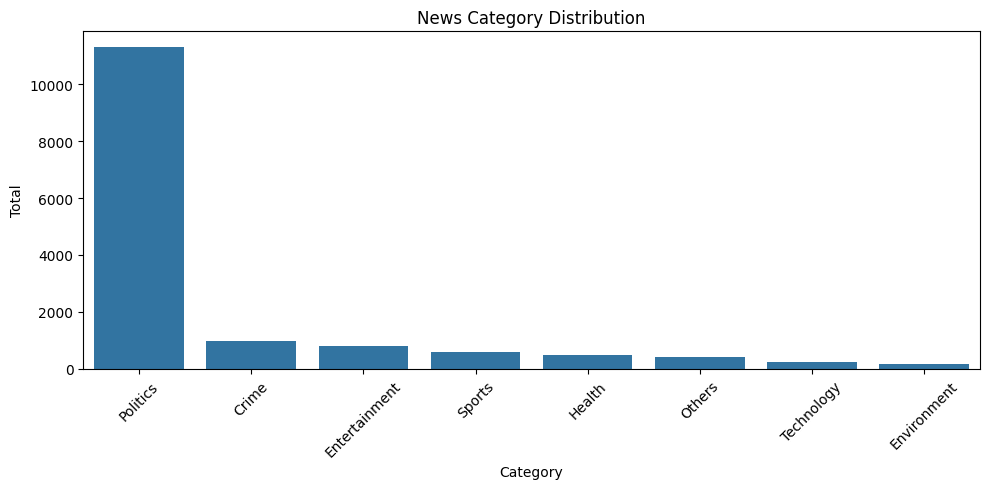

In [ ]:

# Distribusi kategori berita
plt.figure(figsize=(10, 5))
sns.countplot(data=bbc, x='label', order=bbc['label'].value_counts().index)
plt.title('News Category Distribution')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Total')
plt.tight_layout()
plt.show()


<h2>Panjang Teks</h2>

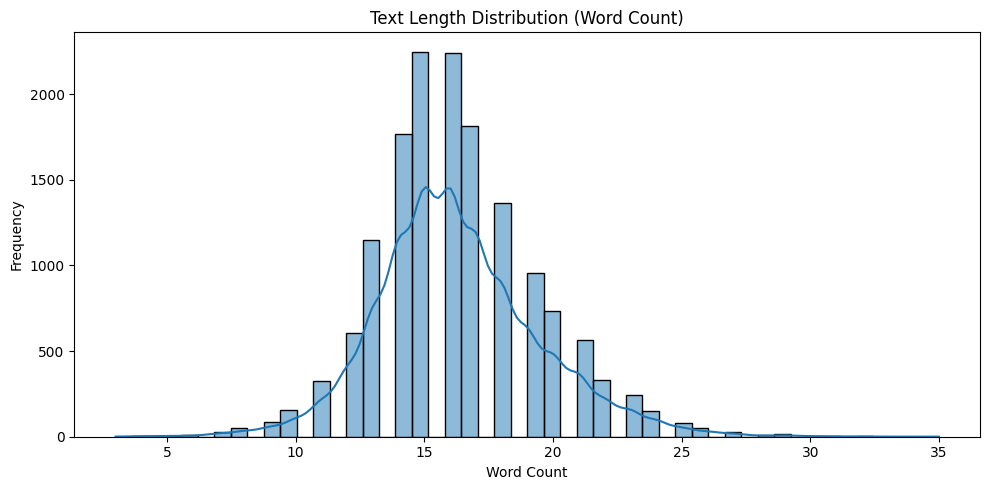

In [ ]:
# Tambahkan kolom jumlah kata
bbc['text_length'] = bbc['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(bbc['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<h2>Frekuensi Kata Kunci</h2>

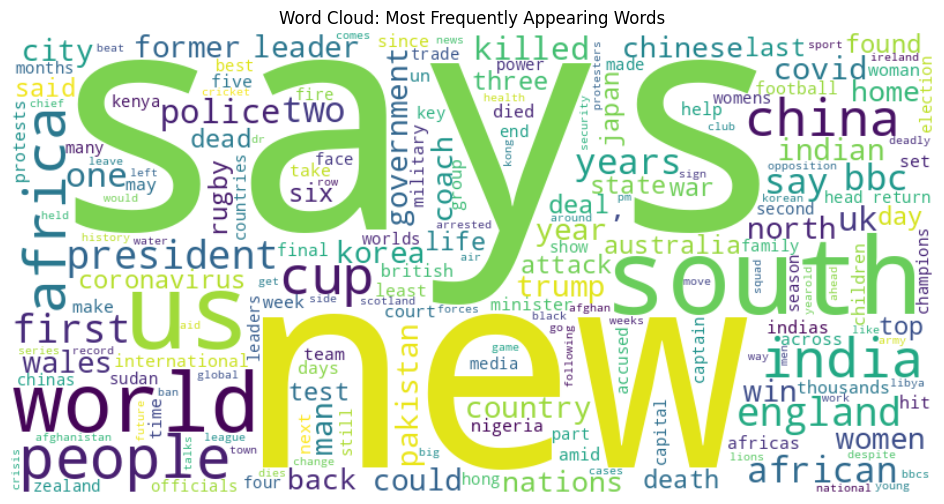

In [ ]:
# Gabungkan semua teks
all_text = " ".join(bbc['clean_text'])

# Hitung frekuensi kata
word_freq = Counter(all_text.split())

# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Frequently Appearing Words')
plt.show()


<h2>Korelasi Fitur</h2>

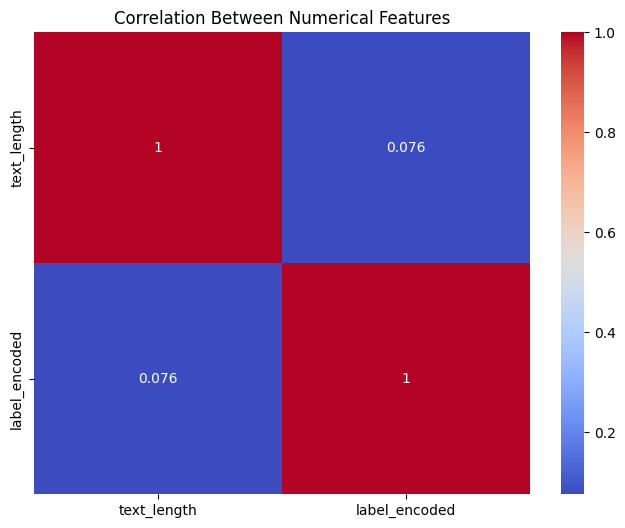

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(bbc[['text_length', 'label_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()


#Model Non-Neural Network

#Multinomial Naive Bayes (MNB)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# 1. Ambil fitur dan label
X = bbc["clean_text"]
y = bbc["label"]

# 2. Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TF-IDF vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=2,
    max_df=0.95
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Buat dan latih model Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
logreg.fit(X_train_tfidf, y_train)

# 5. Prediksi
y_pred = logreg.predict(X_test_tfidf)

# 6. Evaluasi
accuracy_MNB = accuracy_score(y_test, y_pred)
print(f"Akurasi MNB: {accuracy_MNB:.4f}")
print("\nKlasifikasi Report:\n")
print(classification_report(y_test, y_pred, zero_division=1))

Akurasi MNB: 0.7516

Klasifikasi Report:

               precision    recall  f1-score   support

        Crime       0.53      0.42      0.47       198
Entertainment       0.46      0.33      0.39       175
  Environment       0.36      0.27      0.31        44
       Health       0.47      0.39      0.43       102
       Others       0.53      0.30      0.38        94
     Politics       0.84      0.88      0.86      2224
       Sports       0.41      0.59      0.49       123
   Technology       0.18      0.13      0.15        47

     accuracy                           0.75      3007
    macro avg       0.47      0.42      0.43      3007
 weighted avg       0.74      0.75      0.74      3007



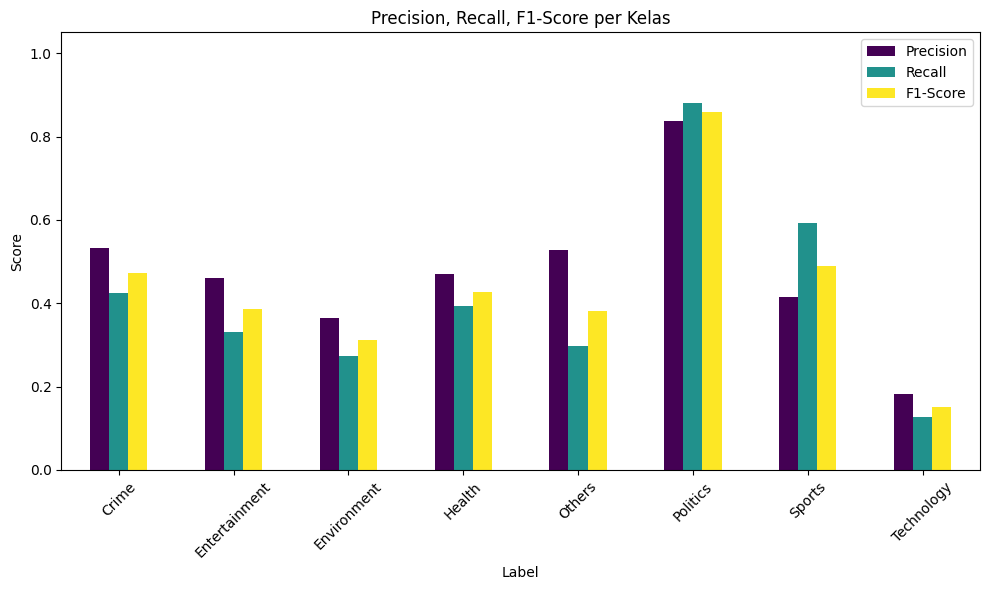

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# Dapatkan metrik per label
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=1)
labels = logreg.classes_

# Buat DataFrame
df_scores = pd.DataFrame({
    "Label": labels,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Visualisasi
df_scores.set_index("Label").plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Precision, Recall, F1-Score per Kelas")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Support Vector Machine (SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# 1. Ambil fitur dan label
X = bbc["clean_text"]
y = bbc["label"]

# 2. Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. TF-IDF vektorisasi dengan pengaturan yang ditingkatkan
vectorizer = TfidfVectorizer(
    max_features=5000,         # lebih fokus pada kata yang paling informatif
    ngram_range=(1,2),         # tetap gunakan unigram + bigram
    min_df=2,                  # jangan buang kata langka terlalu cepat
    max_df=0.95                # buang kata yang muncul terlalu sering
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Tambahkan class_weight untuk atasi imbalance
svm_model = LinearSVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# 5. Prediksi dan evaluasi
y_pred_svm = svm_model.predict(X_test_tfidf)

# 6. Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi SVM (improved): {accuracy_svm:.4f}")
print("\nKlasifikasi Report (SVM):\n")
print(classification_report(y_test, y_pred_svm, zero_division=1))

Akurasi SVM (improved): 0.7526

Klasifikasi Report (SVM):

               precision    recall  f1-score   support

        Crime       0.52      0.57      0.54       196
Entertainment       0.30      0.33      0.31       159
  Environment       0.25      0.30      0.27        37
       Health       0.40      0.44      0.42        98
       Others       0.34      0.39      0.37        87
     Politics       0.91      0.86      0.88      2258
       Sports       0.42      0.60      0.49       120
   Technology       0.12      0.15      0.13        52

     accuracy                           0.75      3007
    macro avg       0.41      0.45      0.43      3007
 weighted avg       0.78      0.75      0.76      3007



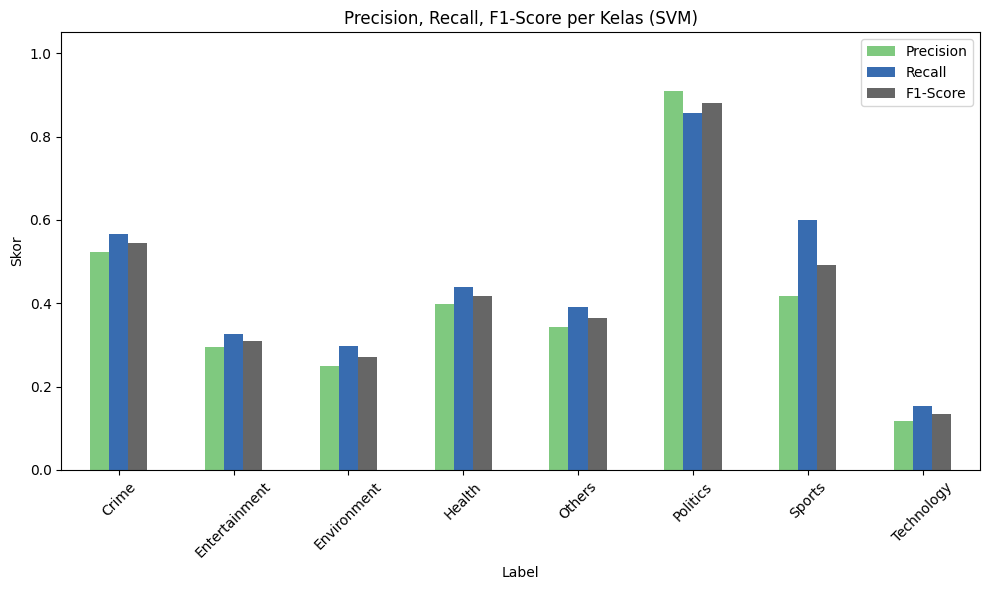

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Hitung metrik
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_svm, zero_division=1)
labels = svm_model.classes_

# DataFrame untuk visualisasi
df_metrics = pd.DataFrame({
    "Label": labels,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Plot metrik
df_metrics.set_index("Label").plot(kind="bar", figsize=(10, 6), colormap="Accent")
plt.title("Precision, Recall, F1-Score per Kelas (SVM)")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Model Neural Network

#Long Short-Term Memory (LSTM)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [ ]:
# 1. Data Preparation
texts = bbc['clean_text'].astype(str).values
labels = bbc['label'].values

# 2. Encode label ke angka
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)
num_classes = categorical_labels.shape[1] # Ambil jumlah kelas dari shape categorical_labels

# 3. Tokenisasi
max_words = 5000  # jumlah kata unik maksimum
max_len = 300     # Panjang tokenisasi ditingkatkan untuk menangani teks berita panjang

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, categorical_labels, test_size=0.2, random_state=42, stratify=encoded_labels # Tambahkan stratify
)

# 5. Hitung class weight untuk handling data imbalance
# Gunakan encoded_labels untuk menghitung class weights karena y_train sudah one-hot encoded
class_weights = compute_class_weight('balanced', classes=np.unique(encoded_labels), y=encoded_labels)
class_weights_dict = dict(enumerate(class_weights))

# 6. Bangun model LSTM dengan arsitektur lebih dalam dan Bidirectional LSTM
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64, return_sequences=False),  # <-- Changed to False
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # num_classes sudah dinamis
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Early Stopping & Model Checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# 8. Latih model dengan lebih banyak epochs dan callbacks untuk mencegah overfitting
model.fit(X_train, y_train,
          epochs=10,  # Menambah epochs untuk peningkatan performa
          batch_size=64,
          validation_split=0.2,
          callbacks=[early_stop, model_checkpoint],  # Menambah ModelCheckpoint
          class_weight=class_weights_dict)  # Tambahkan class_weight untuk handling imbalance

# 9. Evaluasi
loss, accuracy_lstm = model.evaluate(X_test, y_test)
print(f"Akurasi LSTM setelah revisi: {accuracy_lstm:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1238 - loss: 2.0323

151/151 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.1249 - loss: 2.0319 - val_accuracy: 0.5730 - val_loss: 1.2087
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6538 - loss: 1.5019

151/151 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.6541 - loss: 1.5012 - val_accuracy: 0.6424 - val_loss: 1.1060
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7735 - loss: 0.9632

151/151 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.7737 - loss: 0.9630 - val_accuracy: 0.7800 - val_loss: 0.7737
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.8798 - loss: 0.5664 - val_accuracy: 0.7767 - val_loss: 0.8217
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.9045 - loss: 0.2846 - val_accuracy: 0.8116 - val_loss: 0.8565
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9384 - loss: 0.1676 - val_accuracy: 0.8150 - val_loss: 0.8623
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 397ms/step - accuracy: 0.7827 - loss: 0.7491
Akurasi LSTM setelah revisi: 0.7722


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step


<Figure size 1000x600 with 0 Axes>

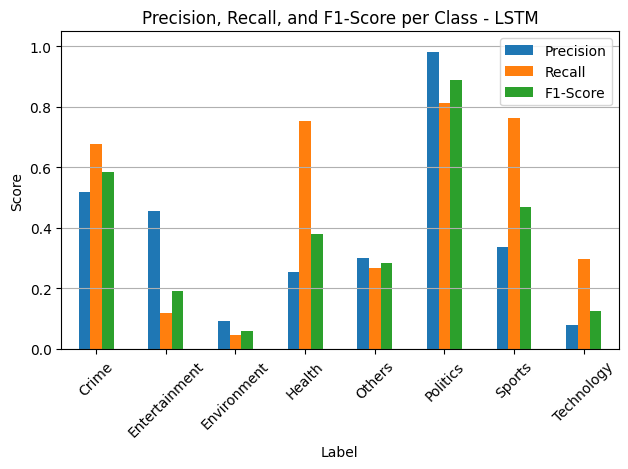


Classification Report:
               precision    recall  f1-score   support

        Crime       0.52      0.68      0.59       198
Entertainment       0.46      0.12      0.19       175
  Environment       0.09      0.05      0.06        44
       Health       0.25      0.75      0.38       102
       Others       0.30      0.27      0.28        94
     Politics       0.98      0.81      0.89      2224
       Sports       0.34      0.76      0.47       123
   Technology       0.08      0.30      0.13        47

     accuracy                           0.72      3007
    macro avg       0.38      0.47      0.37      3007
 weighted avg       0.82      0.72      0.75      3007



In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=1)
labels = label_encoder.classes_


df_metrics = pd.DataFrame({
    'Label': labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Visualisasi
plt.figure(figsize=(10, 6))
df_metrics.set_index("Label")[['Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Precision, Recall, and F1-Score per Class - LSTM')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Optional: Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels, zero_division=1))

#GRU

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#1. Siapkan data
texts = bbc['clean_text'].astype(str).values
labels = bbc['label'].values

# 2. Encode label
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)
num_classes = categorical_labels.shape[1]

# 3. Tokenisasi dan padding
max_words = 10000
max_len = 500

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, categorical_labels, test_size=0.2, random_state=42
)

# 5. Hitung class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(encoded_labels),
    y=encoded_labels
)
class_weights_dict = dict(enumerate(class_weights))

# 6. Buat model GRU
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 7. Training dengan class_weight
model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights_dict
)

# 8. Evaluasi
loss, accuracy_gru = model.evaluate(X_test, y_test)
print(f"\n Akurasi GRU : {accuracy_gru:.4f}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


151/151 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.1898 - loss: 2.0166 - val_accuracy: 0.4649 - val_loss: 1.7626
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.6649 - loss: 1.5539 - val_accuracy: 0.7314 - val_loss: 0.8011
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8520 - loss: 0.7659 - val_accuracy: 0.7576 - val_loss: 0.8624
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9274 - loss: 0.2140 - val_accuracy: 0.7971 - val_loss: 0.8050
Epoch 5/5
 17/151 ━━━━━━━━━━━━━━━━━━━━ 2:40 1s/step - accuracy: 0.9883 - loss: 0.0700

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report sebagai DataFrame
report_dict = classification_report(
    y_true, y_pred, target_names=label_encoder.classes_, output_dict=True
)
report_df = pd.DataFrame(report_dict).T
report_df = report_df.iloc[:-3]  # Hapus avg/macro/weighted avg

# Reset index agar label jadi kolom
report_df = report_df[['precision', 'recall', 'f1-score']].reset_index()
report_df = report_df.rename(columns={'index': 'Label'})

# Ubah ke format long agar bisa di-plot grouped bar
report_long = report_df.melt(id_vars='Label', var_name='Metric', value_name='Score')

# Plot bar grouped
plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='Score', hue='Metric', data=report_long)
plt.title('Precision, Recall, F1-score per Label')
plt.ylim(0, 1.05)
plt.xlabel('Label')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Buat classification report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print(report)

#MODEL

In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Download NLTK resources
try:
    nltk.data.find('tokenizers/punkt_tab')
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading NLTK resources...")
    nltk.download('punkt_tab')
    nltk.download('stopwords')
    print("NLTK resources downloaded.")

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Clean text function (from your original code, with stemming)
def clean_text(text):
    text = text.lower()  # lowercase
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002700-\U000027BF"  # other symbols
                               u"\U000024C2-\U0001F251"  # enclosed characters
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Assign topic function (for fallback)
def assign_topic(clean_text):
    clean_text = clean_text.lower()
    politics_keywords = ['propaganda', 'eu', 'uk', 'ministry', 'un', 'us', 'powersharing', 'strike', 'coup détat', 'opposition', 'persecution',
                        'port', 'envoy', 'putin', 'democracy', 'politics', 'president', 'election', 'parliament', 'legislative', 'politician',
                        'government', 'party', 'campaign', 'diplomatic', 'country', 'diplomacy', 'candidate', 'council', 'trump', 'xi jinping',
                        'visa', 'economic', 'countries', 'china', 'military', 'cooperation', 'war', 'army', 'political', 'soldiers', 'nuclear',
                        'white house', 'netanyahu', 'defectors', 'immunity prosecution', 'levy', 'ceasefire', 'gaza', 'imf', 'refugee',
                        'conflict', 'press', 'crisis', 'air strikes', 'global', 'tension', 'daniella weiss', 'minister', 'rnas culdrose',
                        'expels', 'airstrike', 'relations', 'dr congo']
    crime_keywords = ['steal', 'dangerous', 'exploitation', 'robbers', 'data breach', 'drugging', 'illegal', 'jail', 'cannabis', 'terrorist',
                     'disappeared', 'abduct', 'dies', 'investigation', 'piracy', 'cocaine', 'killer', 'killing', 'crime', 'arrest', 'case',
                     'murder', 'theft', 'caught', 'police', 'prison', 'corruption', 'criminal', 'court', 'suspect', 'evidence', 'fake',
                     'missing', 'tragic', 'bodies found', 'prosecutors', 'law', 'activist', 'trafficking', 'rebel', 'crackdown', 'attack',
                     'smashed', 'jailed', 'dead', 'deaths', 'abuse', 'suicide', 'death', 'crash', 'killed', 'shelling', 'explosions',
                     'gambia', 'stolen', 'scam', 'weapons']
    health_keywords = ['surgery', 'body', 'malaria', 'vaccinate', 'monkeypox', 'polio', 'sanitary', 'autism', 'sight loss', 'menstrual',
                      'health', 'covid', 'virus', 'vaccine', 'disease', 'hospital', 'doctor', 'medicine', 'epidemic', 'pandemic',
                      'isolation', 'test', 'treatment', 'drugs', 'nursing', 'eating disorder', 'injury', 'menopause', 'injured', 'poisoning',
                      'poisonings', 'skin', 'aid', 'safety', 'broken collarbone', 'medical', 'parkinsons']
    entertainment_keywords = ['social', 'instagram', 'grammys', 'hiatus', 'rihanna', 'solo', 'celebrities', 'actor', 'singer', 'concert', 'tickets',
                            'star', 'family', 'bbc', 'game', 'celebrations', 'listeners', 'writer', 'tiktok', 'tourism', 'online', 'media',
                            'broadcasters', 'delicious', 'photo', 'design', 'dictionary', 'charity', 'popular', 'reporter', 'journalist',
                            'netflixs', 'food', 'actors', 'actress', 'entertainment', 'film', 'music', 'artist', 'celebrity', 'cinema', 'theater',
                            'concert', 'show', 'festival', 'drama', 'series', 'tv', 'novel', 'comedian', 'literature', 'museum', 'trips', 'carnival',
                            'happiest cities', 'mixtape', 'art', 'skatepark', 'model', 'disney', 'facebook', 'storytelling', 'influencer',
                            'jiggly caliente', 'youtubes', 'tiaras natalie mageza', 'trendy', 'author', 'sculptures', 'painting', 'beauty']
    sports_keywords = ['paralympian', 'wrestler', 'scott', 'arm', 'grandprix', 'paddleboarder', 'lionesses', 'bowler', 'holesinone', 'netball', 'handballs', 'tennis', 'seasons', 'black', 'stars', 'ufc', 'heather', 'boxer', 'twenty', 'internationals', 'harlequins', 'notts', 'joburg', 'win', 'rfc', 'keeper', 'minto', 'sports', 'league', 'football', 'soccer', 'basketball', 'athlete', 'match', 'competition', 'tournament', 'cup', 'sharks', 'champion', 'team', 'coach', 'springboks', 'mma', 'french', 'shining', 'runs', 'doubleheaders', 'england', 'cricket', 'wolves', 'manchester', 'united', 'wickets', 'rugby', 'run', 'faletau', 'walter', 'wrestling', 'tigers', 'players', 'mud', 'everest', 'barbarians', 'chess', 'northampton', 'lions', 'dragons', 'jl', 'victoria', 'gareth', 'sport', 'referee', 'olympian', 'olympic', 'six', 'liverpool', 'cyclists', 'arsenal', 'marathon', 'chelsea', 'cycles', 'goalkeeper']
    technology_keywords = ['electric', 'robotic', 'mobile', 'jet', 'ai', 'power bank', 'futuristic', 'crypto', 'satellite', 'record', 'batteries',
                          'photographed', 'phone', 'science', 'technology', 'scientist', 'space', 'universe', 'chip', 'seaplanes', 'bullet trains',
                          'highspeed rail', 'evolution', 'tech', 'internet', 'educating', 'robots', 'electronic']
    environment_keywords = ['pigeon', 'floods', 'beach', 'farm', 'elephant', 'cheetah', 'cyclone', 'monkeys', 'tsunami', 'recycling', 'oyster',
                          'drownings', 'sea', 'island', 'whale', 'animal', 'flooding', 'eagle', 'fire', 'weather', 'eclipse', 'glacier', 'osprey',
                          'cosmos', 'duck', 'rescuers', 'quake', 'adventure', 'population', 'park', 'cyclones', 'ospreys', 'contamination',
                          'mounds', 'climate', 'storm', 'ocean', 'rare antelope', 'fish', 'summer', 'flooded', 'ship', 'wildlife', 'zoo',
                          'himalayas', 'wild', 'volcano', 'travel', 'bird', 'penguins', 'shea', 'garden', 'blossoms', 'mount', 'everest',
                          'chimpanzees', 'horses', 'deer', 'water', 'nature', 'river', 'bees', 'tropical', 'planets', 'blossom']

    if any(word in clean_text for word in politics_keywords):
        return 'Politics'
    elif any(word in clean_text for word in crime_keywords):
        return 'Crime'
    elif any(word in clean_text for word in health_keywords):
        return 'Health'
    elif any(word in clean_text for word in entertainment_keywords):
        return 'Entertainment'
    elif any(word in clean_text for word in sports_keywords):
        return 'Sports'
    elif any(word in clean_text for word in technology_keywords):
        return 'Technology'
    elif any(word in clean_text for word in environment_keywords):
        return 'Environment'
    else:
        return 'Others'

# Load dataset
bbc_file = '/content/drive/Shareddrives/UAS DATA/bbc_labeling.csv'

# Interactive classifier
def demo_news_classifier(model, tokenizer, label_encoder):
    print("\n========== NEWS CATEGORY CLASSIFIER ==========")
    print("Klasifikasi kategori berita berdasarkan deskripsi")
    print("===============================================\n")

    max_len = 10000
    while True:
        title = input("Masukkan judul berita baru: ")
        description = input("Masukkan deskripsi berita baru: ")

        if not description.strip():
            print("Deskripsi tidak boleh kosong!\n")
            continue

        print("\nMenganalisis kategori...")

        try:
            combined_text = f"{title} {description}".strip() if title else description.strip()
            cleaned_description = clean_text(combined_text)
            sequences = tokenizer.texts_to_sequences([cleaned_description])
            padded_sequence = pad_sequences(sequences, maxlen=max_len, padding='post')
            predictions = model.predict(padded_sequence, verbose=0)
            predicted_class_index = np.argmax(predictions, axis=1)[0]
            confidence = np.max(predictions) * 100
            predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

            # Confidence threshold and fallback for 'Others'
            if predicted_label == 'Others' and confidence < 70:
                predicted_label = assign_topic(cleaned_description)
                confidence = 50.0

            print("\n========== HASIL KLASIFIKASI ==========")
            if title:
                print(f"Judul Berita Asli   : {title}")
            print(f"Deskripsi Berita Asli: {description}")
            print(f"Deskripsi Bersih     : {cleaned_description}")
            print(f"Sequence (first 10)  : {sequences[0][:10] if sequences[0] else 'Empty sequence'}")
            print(f"Probabilities        : {predictions[0]}")
            print(f"Kategori Prediksi    : {predicted_label}")
            print(f"Tingkat Keyakinan    : {confidence:.2f}%")
            print("=======================================\n")

        except Exception as e:
            print(f"Terjadi kesalahan saat prediksi: {str(e)}")

        again = input("Klasifikasi berita lain? (y/n): ")
        if again.lower() not in ['y', 'yes', 'ya']:
            break

    print("\nTerima kasih telah menggunakan News Category Classifier!")

# Run classifier
if __name__ == "__main__":
    demo_news_classifier(model, tokenizer, label_encoder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

========== NEWS CATEGORY CLASSIFIER ==========
Klasifikasi kategori berita berdasarkan deskripsi

Masukkan judul berita baru: Satellite imagery reveals damage to key Iran nuclear sites
Masukkan deskripsi berita baru: Satellite imagery shared with BBC Verify has provided a clearer picture of damage inflicted on two of Iran's key nuclear sites as well as other military targets.  Imagery from two different providers shows damage to the Natanz nuclear facility as well as a missile site south of the city of Tabriz - hit in the first round of strikes against Iran on Friday.  Other images show damage to other known missile bases.  Israel is continuing to target numerous sites across Iran, which has prompted

Menganalisis kategori...

========== HASIL KLASIFIKASI ==========
Judul Berita Asli   : Satellite imagery reveals damage to key Iran nuclear sites
Deskripsi Be